In [1]:
import pandas as pd

In [189]:
original_new = pd.read_csv('./mistral/Final-original-dataset.csv')
original_new.head()

,sentence,sentiment,prediction
0,"I hope you do, because otherwise your wife mig...",negative,negative
1,I constantly worry about their fight against n...,positive,negative
2,i feel I've had more unhappy years than happy ...,negative,negative
3,"I'm feeling I'm caring, I'm healing, I'm shari...",positive,positive
4,I just feel like if I can make it through this...,positive,negative


In [190]:
original_old = pd.read_csv('../../0-shot-with-datasets-Mistral-0.6/orginal_dataset_cleaned.csv')[['sentence', 'sentiment', 'prediction']]
original_old.head()

,sentence,sentiment,prediction
0,i hope you do because otherwise your wife will...,negative,negative
1,i constantly worry about their fight against n...,positive,negative
2,i didnt want to shoot him sorry to be a party ...,negative,negative
3,i feel i ve had more unhappy years than happy ...,negative,negative
4,im feeling im caring im healing im sharing amp...,positive,positive


In [191]:
original_old.shape

(2458, 3)

In [192]:
original_old.columns

Index(['sentence', 'sentiment', 'prediction'], dtype='object')

In [193]:
original_old.iloc[0].sentence

'i hope you do because otherwise your wife will start to feel if she hasn t already unimportant in your life'

In [194]:
original_new.iloc[0].sentence

'I hope you do, because otherwise your wife might feel unimportant in your life.'

In [217]:
import re

def tokenize(sentence):
    # Convert to lowercase and tokenize by words, ignoring punctuation
    return re.findall(r'\b\w+\b', sentence.lower())

def match_based_on_word_presence(sentence1, sentence2):
    # Tokenize both sentences
    words1 = set(tokenize(sentence1))
    words2 = set(tokenize(sentence2))

    # Find the intersection of words between the two sentences
    common_words = words1.intersection(words2)

    # Check if the intersection constitutes 50% or more of either sentence
    if len(common_words) >= 0.5 * len(words1) or len(common_words) >= 0.5 * len(words2):
        return True  # There's a match based on the criterion
    else:
        return False  # No match found based on the criterion

# Example usage:
# match = match_based_on_word_presence(sentence_from_original_new, sentence_from_original_old)


In [223]:
def find_matching_indices_linear(original_new, original_old):
    matching_indices = []  

    index_old = 0 

    for index_new, row_new in original_new.iterrows():
        sentence_new = row_new['sentence']

        while index_old < len(original_old):
            sentence_old = original_old.iloc[index_old]['sentence']

            if match_based_on_word_presence(sentence_new, sentence_old) ==True:
                matching_indices.append((index_new, index_old))
                index_old += 1  # Move to the next sentence in original_old only when a match is found
                break
            else:
                index_old += 1  # Move to the next sentence in original_old if no match is found

    return matching_indices

# Example usage:
# 

    

In [224]:
matching_indices = find_matching_indices_linear(original_new, original_old)

In [225]:
df_org = original_old.iloc[[y for (x,y) in matching_indices]]

In [256]:
a = pd.read_csv('./original_mistral/log_prob/Original.csv')
b = pd.read_csv('./original_mistral/log_prob/Emojis.csv')

In [257]:
a['sentiment'].to_list() == b['sentiment'].to_list()

False

In [271]:
x = pd.read_csv('./original_mistral/Original.csv')

In [273]:
print(classification_report(x['sentiment'], x['prediction']))

              precision    recall  f1-score   support

    negative       0.82      0.97      0.88      1075
    positive       0.95      0.74      0.83       909

    accuracy                           0.86      1984
   macro avg       0.88      0.85      0.86      1984
weighted avg       0.88      0.86      0.86      1984



0. Original
1. Emoji
2. Filler
3. Hashtags
4. Modifiers
5. misspelling


In [100]:
import os
import pandas as pd

def get_datasets(directory_path):
    dataframes_list = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory_path, filename)
            df = pd.read_csv(file_path)
            dataframes_list.append((df, filename.split('.')[0]))
    return dataframes_list

In [105]:
name_list = ['orginal_dataset_cleaned', 'Filler Words_cleaned', 'Emojify _cleaned', 'Misspelling_continued_cleaned', 'Hashtags_cleaned', 'Misplaced or Dangling Modifiers_cleaned']

In [107]:
maping = {'AAVE-dataset': 'African American English', 'Filler Words_cleaned': 'Original - Filler Words',
         'Hashtags_cleaned': 'Original - Hashtags', 'Emojify _cleaned': 'Original - emojis',
         'Misspelling_continued_cleaned': 'Original - misspelling', 'Misplaced or Dangling Modifiers_cleaned': 'Original - Modifiers',
         'orginal_dataset_cleaned':'Original'}

## Mistral

In [180]:
mistral = get_datasets('../../0-shot-with-datasets-Mistral-0.6/')

In [181]:
for data, name in mistral:
    if (name in name_list):
        datast_filterd = data.iloc[[y for (x,y) in matching_indices]]
        datast_filterd.to_csv(f'./original_mistral/{maping[name]}.csv', index=False)

In [182]:
for data, name in mistral:
    print(name)

orginal_dataset_cleaned
African American English_cleaned
Filler Words_cleaned
Emojify _cleaned
Misspelling_continued_cleaned
Mixed Language_cleaned
Mixed Constructions_cleaned
Subject-Verb Agreement Errors_cleaned
Sentence Fragments_cleaned
Run-on Sentences and Comma Splices_cleaned
Pronoun-Antecedent Agreement Errors_cleaned
Misplaced or Dangling Modifiers_cleaned
Incorrect Use of Articles_cleaned
Incorrect Tense Use_cleaned
Formalize_cleaned
Hashtags_cleaned


In [188]:
mistral[0][0]['sentiment'].to_list() == mistral[5][0]['sentiment'].to_list()

True

## LLama

In [111]:
llama2 = get_datasets('../../0-shot-with-datasets-LLama2-0.6/')

In [113]:
for data, name in llama2:
    if (name in name_list):
        datast_filterd = data.iloc[[y for (x,y) in matching_indices]]
        datast_filterd.to_csv(f'./original_llama2/{maping[name]}.csv', index=False)

## Gemma

In [114]:
gemma = get_datasets('../../0-shot-with-datasets-gemma-0.6/')

In [115]:
for data, name in llama2:
    if (name in name_list):
        datast_filterd = data.iloc[[y for (x,y) in matching_indices]]
        datast_filterd.to_csv(f'./original_gemma/{maping[name]}.csv', index=False)

## Calculating Metrics

In [290]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json
def cal_and_save_metrics(dataframe_list, model_name, directory):
    for data, name in dataframe_list:
        metrics = classification_report(data['sentiment'], data['prediction'], output_dict=True)
        cm = confusion_matrix(data['sentiment'], data['prediction'], labels=["positive", "negative"])
        TN, FP, FN, TP = cm.ravel()
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        FNR = FN / (FN + TP)
        TNR = TN / (TN + FP)
        metrics['TPR'] = TPR
        metrics['FPR'] = FPR
        metrics['TNR'] = TNR
        metrics['FNR'] = FNR

        # Plotting the confusion matrix
        fig, ax = plt.subplots()
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=["positive", "negative"], yticklabels=["positive", "negative"])
        ax.set_title(f'{model_name} 7B Confusion Matrix for {name.split("_cleaned")[0]}')
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')

        report_json = json.dumps(metrics, indent=4)
        with open(f'./{directory}/{name}_classification_report.json', 'w') as file:
            file.write(report_json)
        plt.savefig(f"./{directory}/plots/{name}_CM_plot.png")

/local/home/furquanh/miniconda3/envs/augmentation-project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/local/home/furquanh/miniconda3/envs/augmentation-project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/local/home/furquanh/miniconda3/envs/augmentation-project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _wa

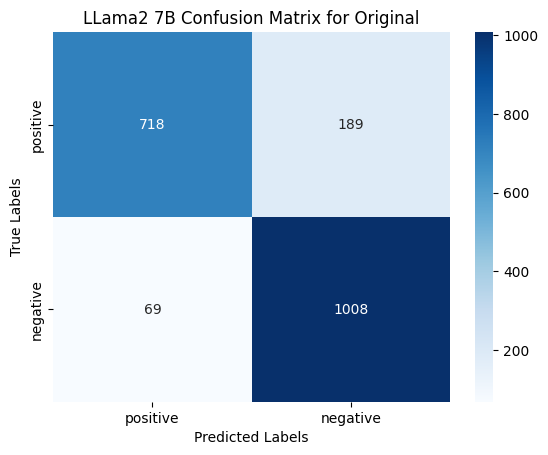

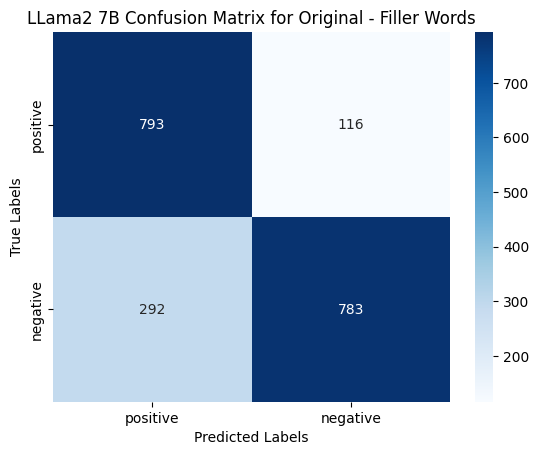

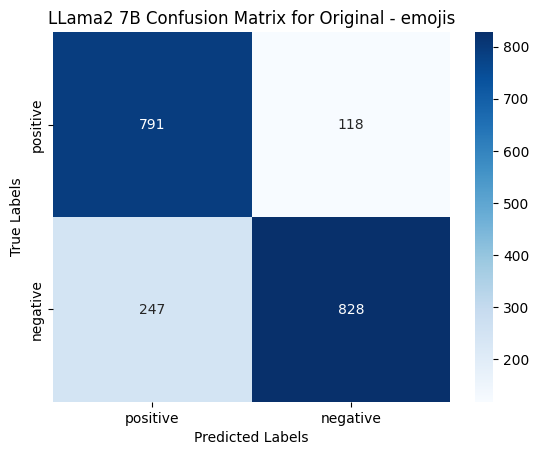

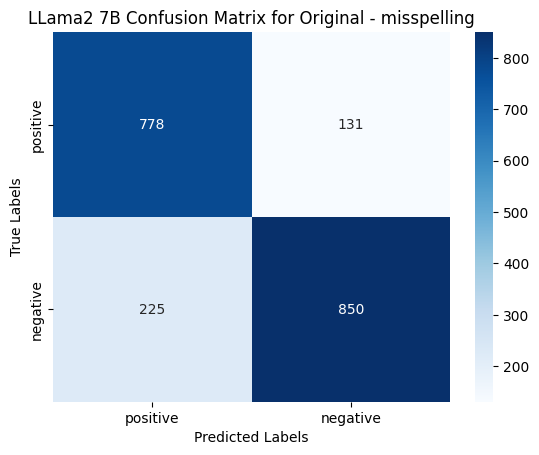

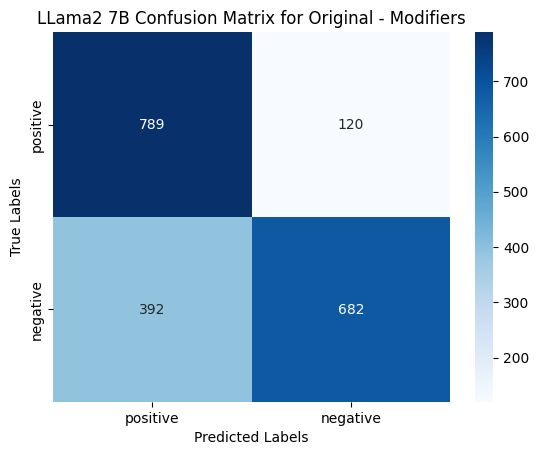

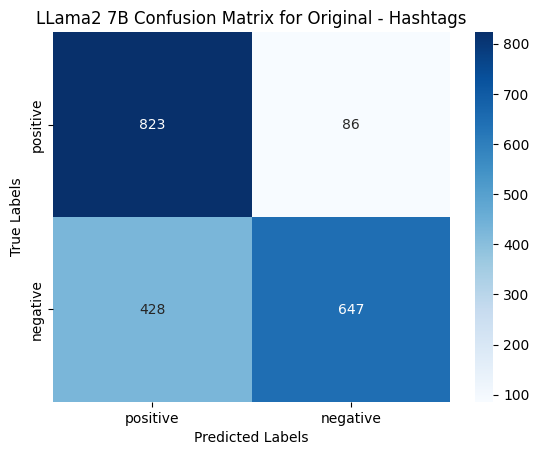

In [293]:
gemma_org = get_datasets('Original_llama2') 
cal_and_save_metrics(gemma_org, 'LLama2', 'Original_llama2')

/local/home/furquanh/miniconda3/envs/augmentation-project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/local/home/furquanh/miniconda3/envs/augmentation-project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/local/home/furquanh/miniconda3/envs/augmentation-project/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _wa

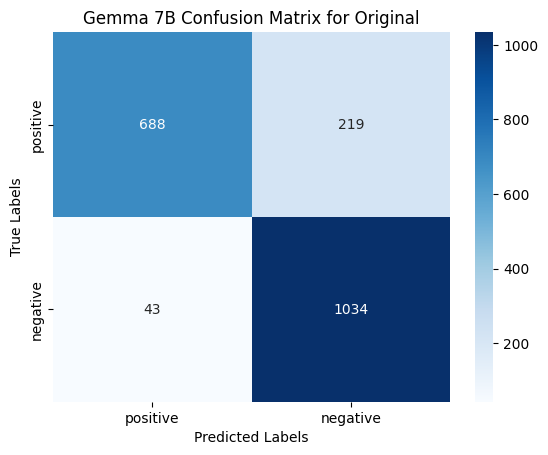

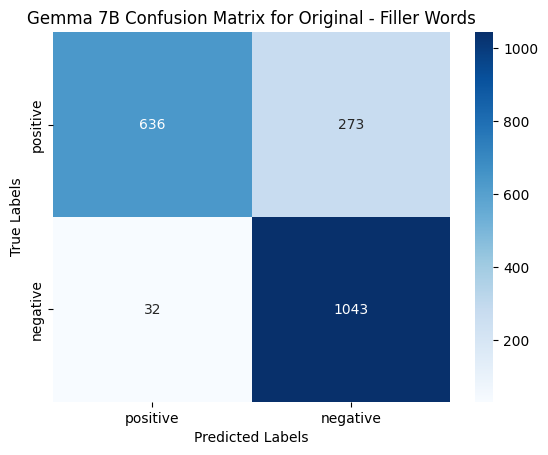

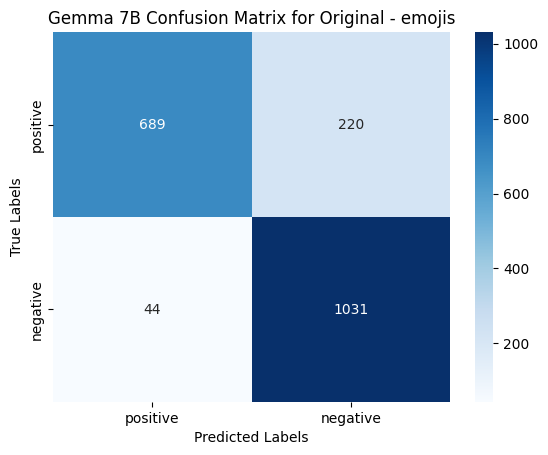

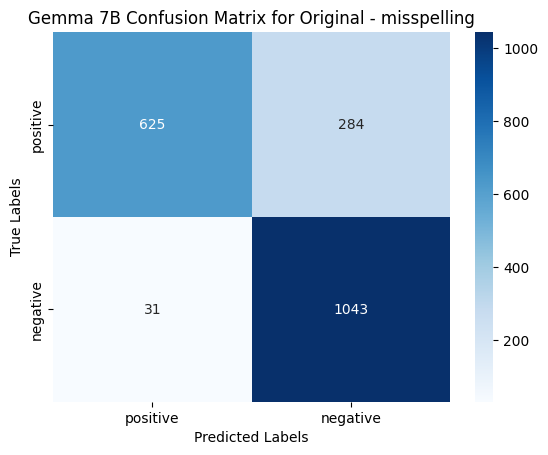

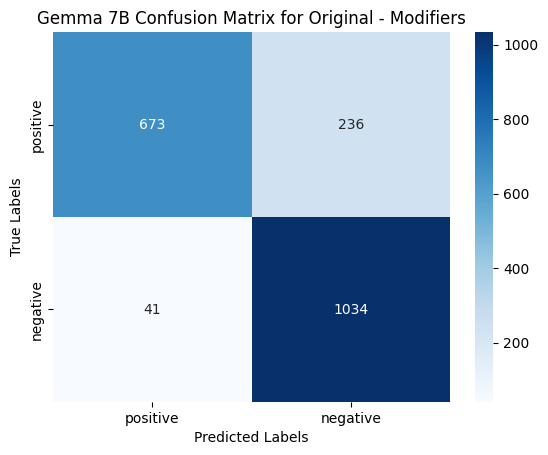

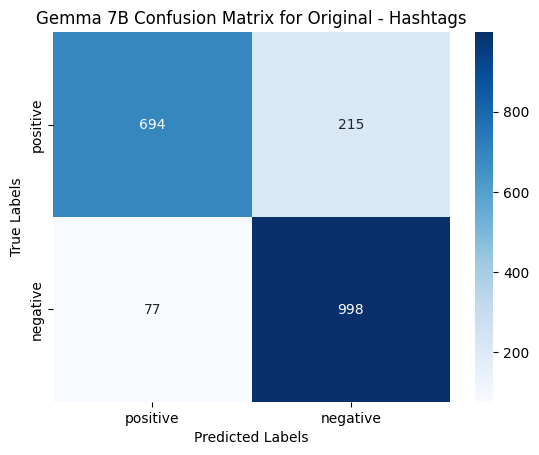

In [179]:
gemma_org = get_datasets('original_gemma') 
cal_and_save_metrics(gemma_org, 'Gemma', 'original_gemma')

In [275]:
import os
import pandas as pd
from datasets import load_dataset

directory_path = "./original_llama2/log_prob"

dataset_list = []

for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory_path, filename)
        dataset = pd.read_csv(file_path)
        dataset_list.append((dataset, filename.split('.')[0]))

In [280]:
original, _ = dataset_list.pop(-1)

In [281]:
original.head()

,sentence,sentiment,Log Prob
0,"I hope you do, because otherwise your wife mig...",negative,-7.161810
1,I constantly worry about their fight against n...,positive,-7.715484
2,i feel I've had more unhappy years than happy ...,negative,-2.644392
3,"I'm feeling I'm caring, I'm healing, I'm shari...",positive,-2.607409
4,I just feel like if I can make it through this...,positive,-4.421666


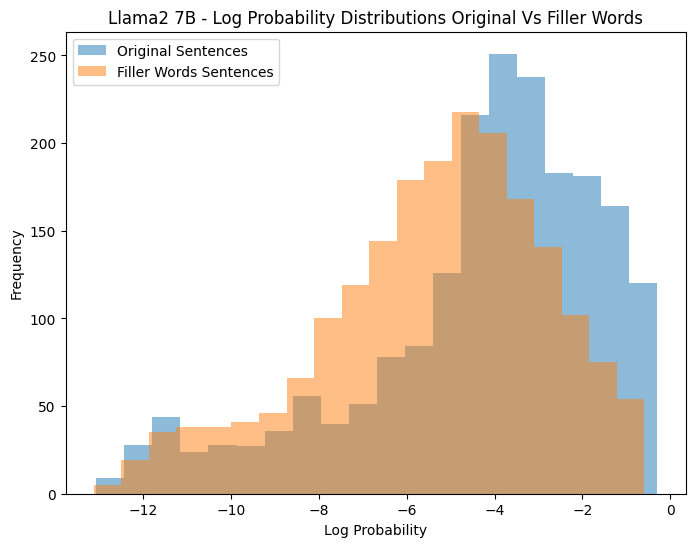

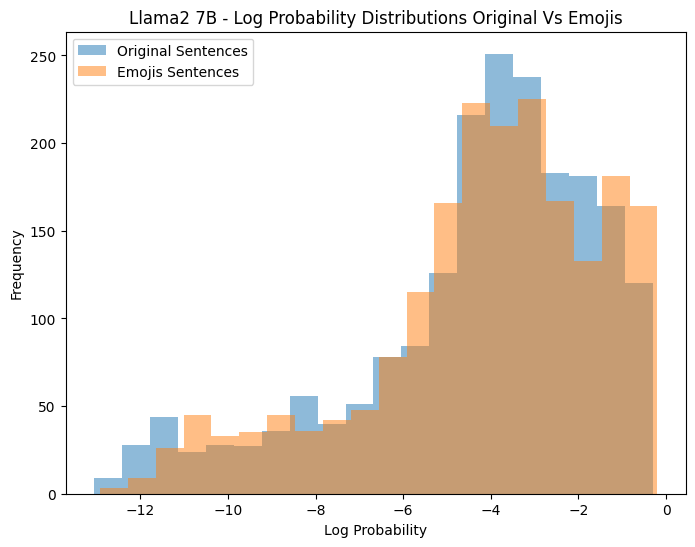

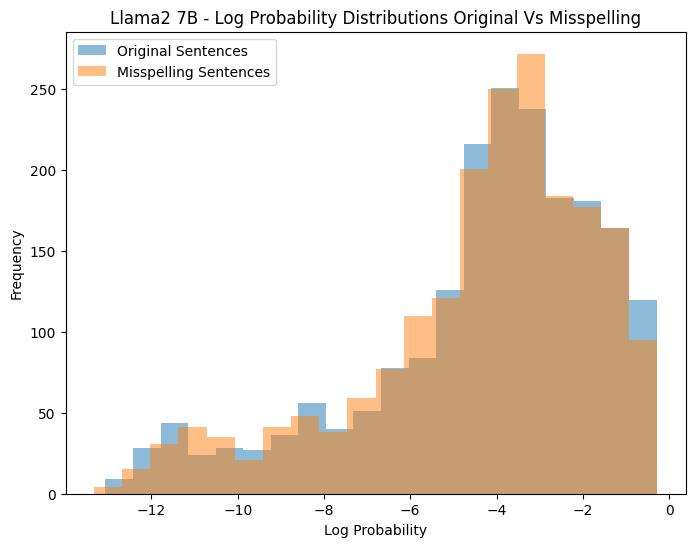

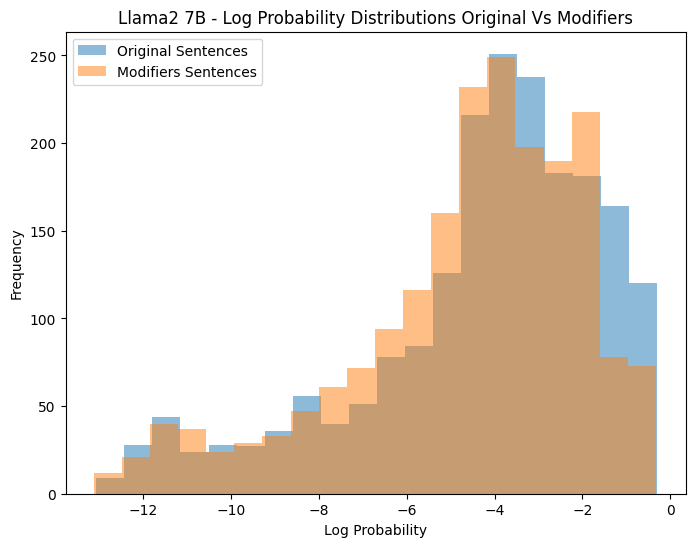

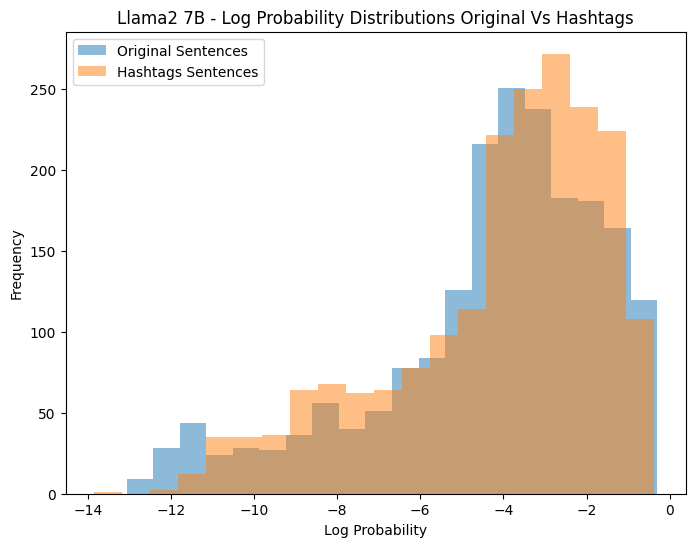

In [286]:
for dataset, name in dataset_list:
    plt.figure(figsize=(8, 6)) 
    plt.hist(original['Log Prob'], bins=20, alpha=0.5, label='Original Sentences')
    plt.hist(dataset['Log Prob'], bins=20, alpha=0.5, label=f'{name} Sentences')
    plt.title(f'Llama2 7B - Log Probability Distributions Original Vs {name}')
    plt.xlabel('Log Probability')
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    plt.savefig(f"./original_llama2/log_prob/{name}.png")
    plt.show()